In [1]:
# Import important libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

def warn(*args,**kwargs):pass
import warnings
warnings.warn=warn

In [4]:
# Reading Gold pricing dataset into Pandas dataframe
#read in the file into Pandas dataframe
gold_df = pd.read_csv('./gold_prices.csv')
#gold_df = pd.read_csv('gold_prices.csv')

gold_df.sort_values(by=['Date'], inplace=True, ascending = True)


gold_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
# data cleaning

# convert all column names to lower case
gold_df.columns = gold_df.columns.str.lower()

# strip all extra white spaces from column names
gold_df.columns = gold_df.columns.str.strip()

gold_df.columns = gold_df.columns.str.replace(' ', '')

# keeping names consistent for column names across all companies stock price information
gold_df.columns = gold_df.columns.str.replace('ajclose', 'adjclose')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Removing data from the RHO stock due to insufficient information
gold_df.drop(['rho_price'], axis=1, inplace=True )

In [8]:
# Convert the datatype of certain columns to keep it consistent for all the stocks.

# Convert the date column to datetime format
gold_df['date'] = pd.to_datetime(gold_df['date'])

# connverting (open, high, low) information of stocks into float type
gold_df = gold_df.astype({"sf_open":'float', "sf_high":'float', "sf_low":'float'}) 

#gold_df.info()




In [10]:
# Sorting the dataframe by the stock names in alphabetical order
col_list = gold_df.columns[:7].tolist() + sorted(gold_df.columns[7:].tolist())
#print (col_list)
gold_df = gold_df[col_list]
gold_df.head()

,week_number,date,open,high,low,close,adjclose,dj_adjclose,dj_close,dj_high,dj_low,dj_open,dj_volume,eg_adjclose,eg_close,eg_high,eg_low,eg_open,eg_volume,eu_high,eu_low,eu_open,eu_price,eu_trend,gdx_adjclose,gdx_close,gdx_high,gdx_low,gdx_open,gdx_volume,of_high,of_low,of_open,of_price,of_trend,of_volume,os_high,os_low,os_open,os_price,os_trend,pld_high,pld_low,pld_open,pld_price,pld_trend,plt_high,plt_low,plt_open,plt_price,plt_trend,sf_high,sf_low,sf_open,sf_price,sf_trend,sf_volume,sp_adjclose,sp_close,sp_high,sp_low,sp_open,sp_volume,usb_high,usb_low,usb_open,usb_price,usb_trend,usdi_high,usdi_low,usdi_open,usdi_price,usdi_trend,usdi_volume,uso_adjclose,uso_close,uso_high,uso_low,uso_open,uso_volume,volume
0,50,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,11868.80957,11868.80957,11967.83984,11825.21973,11825.29004,136930000,70.431755,72.900002,76.150002,72.150002,74.550003,787900,1.3051,1.2957,1.2982,1.3018,1,48.973877,51.680000,53.139999,51.570000,53.009998,20605600,106.50,104.88,104.88,105.09,1,14330,96.00,93.33,94.91,93.42,0,615.00,614.60,614.70,618.85,1,1423.35,1376.85,1420.30,1414.65,0,54248.0,52316.0,54248.0,53604,1,119440,105.441238,122.180000,123.199997,121.989998,123.029999,199109200,1.911,1.911,1.911,1.911,1,80.630,80.130,80.565,80.341,0,22850,36.130001,36.130001,36.939999,36.049999,36.900002,12616700,21521900
1,50,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,11866.38965,11866.38965,11968.17969,11819.30957,11870.25000,389520000,72.364037,74.900002,75.099998,73.349998,73.599998,896600,1.3087,1.2997,1.3020,1.3035,1,49.921513,52.680000,53.180000,52.040001,52.500000,16285400,104.56,102.46,103.51,103.35,0,140080,94.80,92.53,93.43,93.79,1,623.45,622.30,622.60,623.65,1,1431.75,1400.70,1414.75,1420.25,1,54030.0,52890.0,53650.0,53458,0,65390,105.597549,121.589996,122.949997,121.300003,122.230003,220481400,1.851,1.851,1.851,1.851,0,80.395,79.935,80.175,80.249,0,13150,36.270000,36.270000,36.500000,35.730000,36.180000,12578800,18124300
2,51,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,11766.25977,11766.25977,11925.87988,11735.19043,11866.54004,135170000,62.509384,64.699997,69.800003,64.199997,69.099998,2096700,1.3044,1.2981,1.3043,1.2995,0,48.490578,51.169998,52.549999,51.029999,52.490002,15120200,104.57,102.37,103.63,103.64,1,147880,94.43,92.55,93.77,94.09,1,630.00,608.60,626.00,608.80,0,1427.60,1404.60,1422.65,1411.10,0,53400.0,52544.0,53400.0,52961,0,67280,104.468536,120.290001,122.320000,120.029999,122.059998,183903000,1.810,1.810,1.810,1.810,0,80.470,80.125,80.300,80.207,0,970,36.200001,36.200001,36.450001,35.930000,36.389999,7418200,12547200
3,51,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,12103.58008,12103.58008,12117.12988,11768.83008,11769.20996,165180000,64.731514,67.000000,68.099998,66.000000,66.449997,875300,1.3133,1.2994,1.3003,1.3079,1,50.215282,52.990002,53.250000,52.369999,52.380001,11644900,107.27,103.91,104.30,106.73,1,170240,99.70,96.39,96.39,95.55,1,622.45,622.45,622.45,626.65,1,1436.55,1408.15,1408.95,1434.75,1,53575.0,52595.0,52795.0,53487,1,55130,107.629784,123.930000,124.139999,120.370003,122.180000,225418100,1.927,1.927,1.927,1.927,1,80.940,80.035,80.890,80.273,1,22950,37.560001,37.560001,37.610001,37.220001,37.299999,10041600,9136300
4,51,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,12107.74023,12107.74023,12119.70020,11999.44043,12103.58008,163250000,66.180725,68.500000,69.400002,66.900002,67.099998,837600,1.3197,1.3024,1.3079,1.3045,0,50.186852,52.959999,53.430000,52.419998,53.150002,8724300,108.17,106.16,107.15,107.71,1,145090,99.26,96.81,97.54,99.01,1,641.50,623.80,625.70,635.90,1,1453.75,1417.65,1434.40,1429.05,0,54184.0,52937.0,53519.0,53148,0,75950,107.838242,124.169998,124.360001,122.750000,123.930000,194230900,1.970,1.970,1.970,1.970,1,80.445,79.550,80.105,80.350,1,24140,38.110001,38.110001,38.240002,37.520000,37.669998,10728000,11996100


In [11]:
# check for null values 
print("\nTotal number of null values are:\n", gold_df.isnull().sum() )

# check for duplicate values 
print("\nTotal number of duplicates values are:\n", gold_df.duplicated().sum() )

# Remove duplicates if there are any
gold_df.drop_duplicates(keep=False, inplace=True)


Total number of null values are:
 week_number     0
date            0
open            0
high            0
low             0
close           0
adjclose        0
dj_adjclose     0
dj_close        0
dj_high         0
dj_low          0
dj_open         0
dj_volume       0
eg_adjclose     0
eg_close        0
eg_high         0
eg_low          0
eg_open         0
eg_volume       0
eu_high         0
eu_low          0
eu_open         0
eu_price        0
eu_trend        0
gdx_adjclose    0
gdx_close       0
gdx_high        0
gdx_low         0
gdx_open        0
gdx_volume      0
of_high         0
of_low          0
of_open         0
of_price        0
of_trend        0
of_volume       0
os_high         0
os_low          0
os_open         0
os_price        0
os_trend        0
pld_high        0
pld_low         0
pld_open        0
pld_price       0
pld_trend       0
plt_high        0
plt_low         0
plt_open        0
plt_price       0
plt_trend       0
sf_high         0
sf_low          0
sf_open    

In [12]:
gold_df.describe(percentiles = [0.90,0.95,0.99])

,week_number,open,high,low,close,adjclose,dj_adjclose,dj_close,dj_high,dj_low,dj_open,dj_volume,eg_adjclose,eg_close,eg_high,eg_low,eg_open,eg_volume,eu_high,eu_low,eu_open,eu_price,eu_trend,gdx_adjclose,gdx_close,gdx_high,gdx_low,gdx_open,gdx_volume,of_high,of_low,of_open,of_price,of_trend,of_volume,os_high,os_low,os_open,os_price,os_trend,pld_high,pld_low,pld_open,pld_price,pld_trend,plt_high,plt_low,plt_open,plt_price,plt_trend,sf_high,sf_low,sf_open,sf_price,sf_trend,sf_volume,sp_adjclose,sp_close,sp_high,sp_low,sp_open,sp_volume,usb_high,usb_low,usb_open,usb_price,usb_trend,usdi_high,usdi_low,usdi_open,usdi_price,usdi_trend,usdi_volume,uso_adjclose,uso_close,uso_high,uso_low,uso_open,uso_volume,volume
count,1718.0,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1.718000e+03
mean,26.697322,127.323434,127.854237,126.777695,127.319482,127.319482,18164.119043,18164.119043,18244.137842,18073.889095,18161.094398,1.779131e+08,27.783958,28.209302,28.822555,27.653655,28.276554,1.136074e+06,1.213360,1.203692,1.208531,1.208494,0.494761,25.924624,26.715012,27.071304,26.384575,26.747427,4.356515e+07,78.384936,76.593894,77.521740,77.504523,0.498836,225958.585565,71.120256,69.330990,70.275396,70.153097,0.503492,773.529302,759.444208,766.363481,766.805122,0.530850,1194.274622,1173.409692,1184.388853,1183.915425,0.484284,43671.194412,42911.912107,43308.692084,43284.478463,0.480792,26912.462165,192.204570,204.491222,205.372637,203.487014,204.490023,1.098026e+08,2.286512,2.238765,2.263091,2.262769,0.490105,90.098981,89.509331,89.805442,89.809427,0.512806,27568.300349,22.109051,22.109051,22.307148,21.904657,22.113417,1.922313e+07,8.446327e+06
std,14.970688,17.526993,17.631189,17.396513,17.536269,17.536269,3884.495887,3884.495887,3906.008604,3867.959072,3889.752079,1.212753e+08,19.721857,20.294635,20.620624,19.972314,20.325861,7.301289e+05,0.100184,0.100695,0.100579,0.100535,0.500118,9.886570,10.603110,10.706388,10.490908,10.620552,2.909151e+07,27.393294,27.322868,27.366113,27.400703,0.500144,88844.540581,23.494737,23.422198,23.480047,23.471514,0.500133,149.010291,147.381087,148.078365,148.307189,0.499193,275.427791,271.799909,273.978168,273.842095,0.499898,7614.302267,7443.076538,7550.423242,7530.704012,0.499776,21880.969122,48.514161,43.776999,43.974644,43.618940,43.831928,4.925110e+07,0.437574,0.429960,0.433977,0.433469,0.500048,7.567895,7.459269,7.520788,7.516115,0.499982,14643.314699,11.432787,11.432787,11.478671,11.373997,11.431056,1.575743e+07,4.920731e+06
min,1.0,100.919998,100.989998,100.230003,100.500000,100.500000,11766.259770,11766.259770,11925.879880,11735.190430,11769.209960,8.410000e+06,2.800000,2.800000,2.850000,2.730000,2.770000,1.645000e+05,1.041900,1.034100,1.039000,1.038700,0.000000,12.269618,12.470000,12.920000,12.400000,12.700000,4.729000e+06,28.750000,27.100000,27.990000,27.880000,0.000000,11520.000000,27.610000,26.180000,27.340000,26.550000,0.000000,473.150000,458.600000,458.600000,470.450000,0.000000,786.500000,756.000000,765.300000,775.600000,0.000000,33566.000000,32626.000000,33146.000000,33170.000000,0.000000,40.000000,104.468536,120.29000

# feedback - run Analysis on .95 and then 0.99 for the comparison of results

In [13]:
# Handle outliers in the dataset
# to be checked basis of the gold_df.describe(percentiles = [0.90,0.95,0.99])

#target variable is open gold since other variables are using open

#Dropping the outlier rows with Percentiles
upper_lim = gold_df['open'].quantile(.95)
lower_lim = gold_df['open'].quantile(.05)

data = gold_df[(gold_df['open'] < upper_lim) & (gold_df['open'] > lower_lim)]


In [14]:
# gold_df after removing outliers
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   week_number   1718 non-null   UInt32        
 1   date          1718 non-null   datetime64[ns]
 2   open          1718 non-null   float64       
 3   high          1718 non-null   float64       
 4   low           1718 non-null   float64       
 5   close         1718 non-null   float64       
 6   adjclose      1718 non-null   float64       
 7   dj_adjclose   1718 non-null   float64       
 8   dj_close      1718 non-null   float64       
 9   dj_high       1718 non-null   float64       
 10  dj_low        1718 non-null   float64       
 11  dj_open       1718 non-null   float64       
 12  dj_volume     1718 non-null   int64         
 13  eg_adjclose   1718 non-null   float64       
 14  eg_close      1718 non-null   float64       
 15  eg_high       1718 non-null   float64 

In [15]:
gold_df.shape

(1718, 81)

In [16]:
# splitting the dataset for training and testing 
# We decided that the last two years ( 2017 -2018) of the data will be used for the testing and the rest (2013-2016) will be used for the training of the prediction model

gold_df = gold_df[gold_df['date'] > dt.datetime(2013,6,1)]

train_df = gold_df[gold_df['date'] < dt.datetime(2017,1,1)]

test_df = gold_df[gold_df['date'] >= dt.datetime(2017,1,1)]



In [17]:
gold_df.shape, train_df.shape, test_df.shape

((1369, 81), (873, 81), (496, 81))

In [18]:
# normalize the dataset
scaler = StandardScaler()
col_list.remove('date')
train_df[col_list] = scaler.fit_transform(train_df[col_list])

test_df[col_list] = scaler.fit_transform(test_df[col_list])

In [19]:
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 349 to 1221
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   week_number   873 non-null    float64       
 1   date          873 non-null    datetime64[ns]
 2   open          873 non-null    float64       
 3   high          873 non-null    float64       
 4   low           873 non-null    float64       
 5   close         873 non-null    float64       
 6   adjclose      873 non-null    float64       
 7   dj_adjclose   873 non-null    float64       
 8   dj_close      873 non-null    float64       
 9   dj_high       873 non-null    float64       
 10  dj_low        873 non-null    float64       
 11  dj_open       873 non-null    float64       
 12  dj_volume     873 non-null    float64       
 13  eg_adjclose   873 non-null    float64       
 14  eg_close      873 non-null    float64       
 15  eg_high       873 non-null    float64

### **Exploratory Data Analysis: Data Visualization**

Line Plot: We can create a line plot of the closing gold prices over time using the matplotlib library.

From the plot, we can see that the adj. closed gold prices have decreased over time, with some fluctuations.


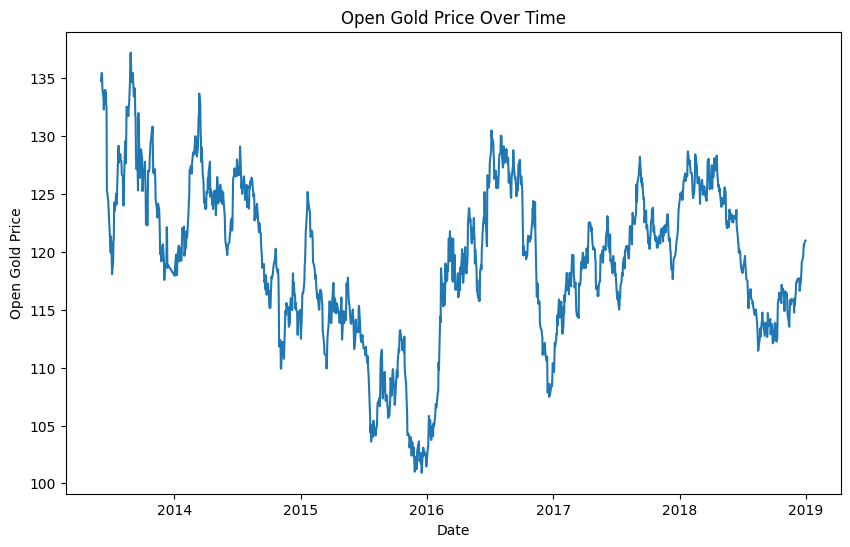

In [20]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='open', data=gold_df)
plt.title('Open Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Gold Price')
plt.show()




#can see that gold price was comparatively higher in 2012-2013
#before suddenly dropping until 2014


# Feedback: Study why the US Gold price drastically dropped starting 2013

Box Plot: We can create a box plot of the closing gold prices by year using the seaborn library.

From the plot, we can see that the closing gold prices have generally decreased over the years, with some outliers.

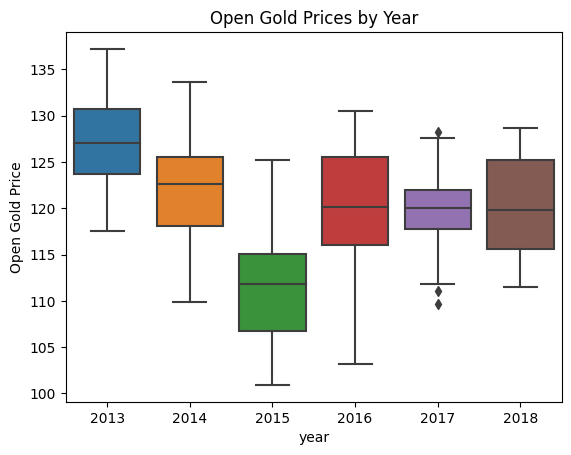

In [21]:
gold_df['year'] = gold_df['date'].dt.year
sns.boxplot(x='year', y = 'open', data = gold_df)
plt.title('Open Gold Prices by Year')
plt.xlabel('year')
plt.ylabel('Open Gold Price')
plt.show()

Heatmap: We can create a heatmap to visualize the correlation between the stock prices using the seaborn library.

From the heatmap, we can see that the opening and closing prices have a strong positive correlation, while the low and high prices have a weaker positive correlation.

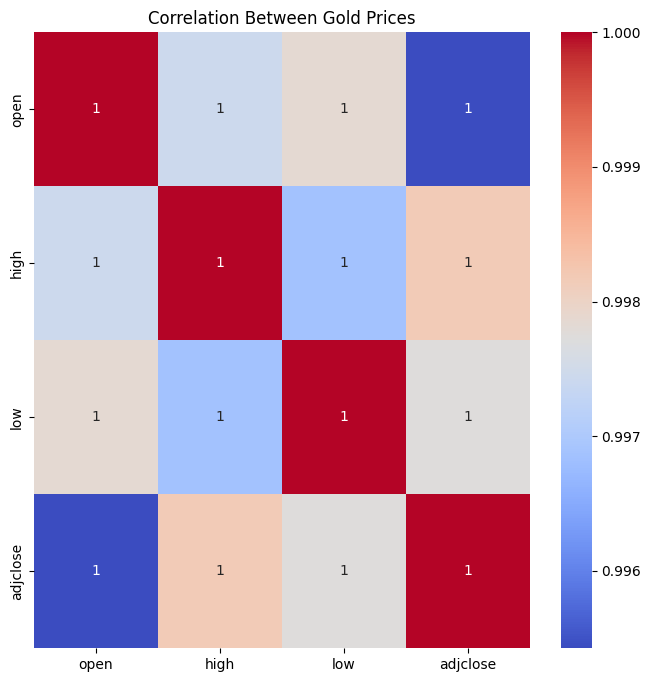

In [22]:
# Create a heatmap of the correlation between stock prices
corr = gold_df[['open', 'high', 'low', 'adjclose']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Gold Prices')
plt.show()


# Feedback: two correlation matrix: of independent stocks and then one with the gold prices



# Run feature selection before creating correlation matrix

# Feedback: All close / open for creating correlation matrix

We can start by visualizing the distribution of the target variable, which in this case is the open stock price. 

We can use a histogram to visualize the distribution.

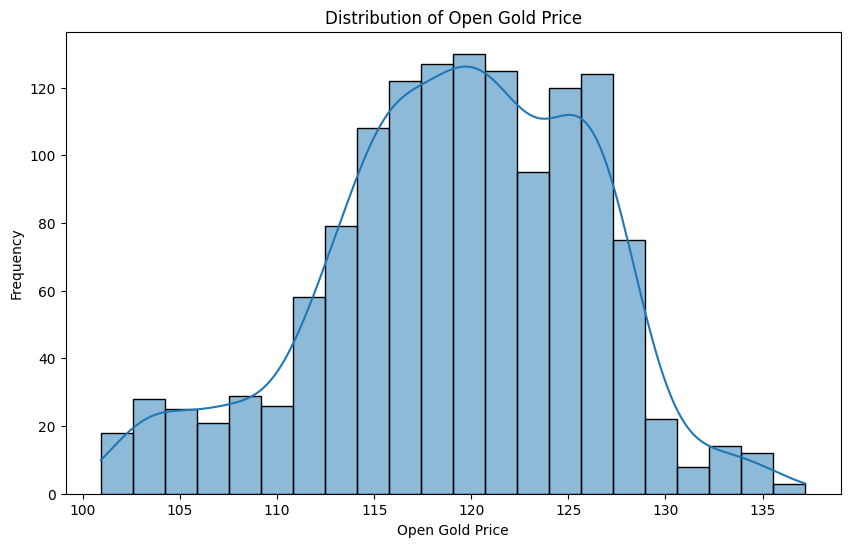

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(gold_df['open'], kde=True)
plt.title('Distribution of Open Gold Price')
plt.xlabel('Open Gold Price')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Extract all the independent variables
x = gold_df.iloc[:, list(range(5)) + list(range(6, len(gold_df.columns)))]

# extract the dependent variable
y= gold_df.iloc[:,5].values  

print("\n Total independent variables:", len(x.columns))



 Total independent variables: 81


Text(0, 0.5, 'Open Price Average')

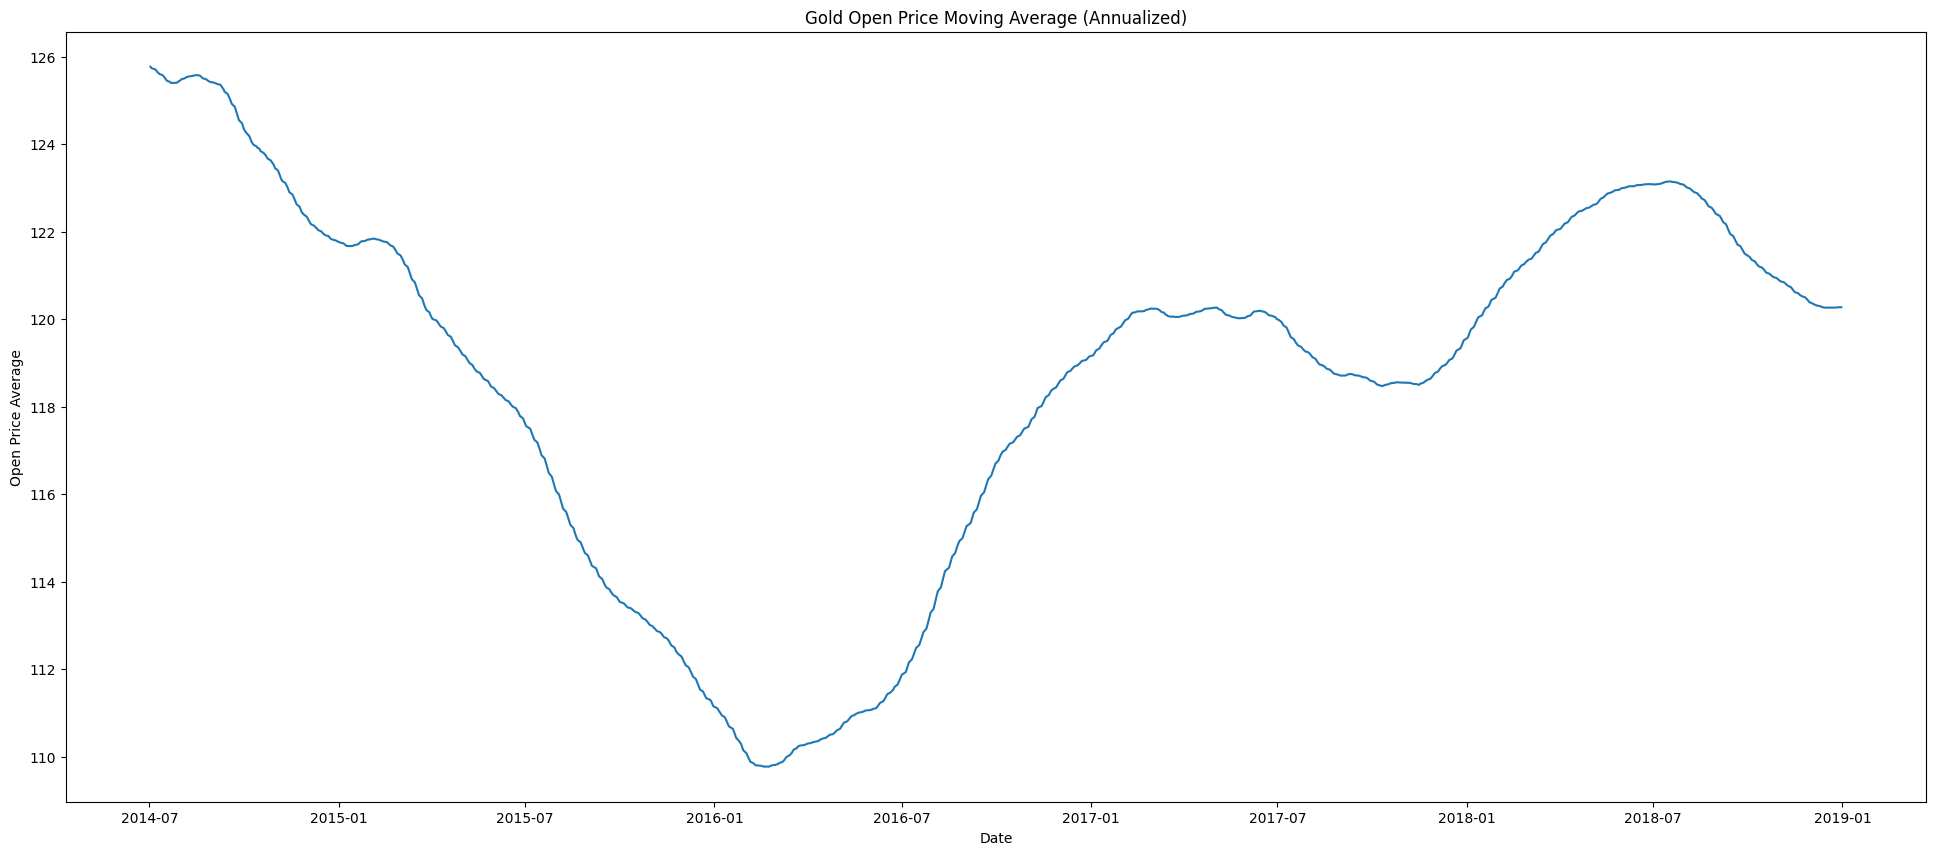

In [25]:
#df['Rolling Close Average'] = df['Close*'].rolling(2).mean()

#Can graph the moving average of gold open

fig,ax = plt.subplots(1,1,figsize=(24,10))
ax.plot(gold_df.date, gold_df.open.rolling(252).mean())
ax.set_title("Gold Open Price Moving Average (Annualized)")
ax.set_xlabel("Date")
ax.set_ylabel("Open Price Average")


#can see that gold price was comparatively higher in 2012-2013
#before suddenly dropping until 2014

#moving average allows us to see smoother relationship that daily open
#see that gold price was deep declining 2013-mid 2014 
#and then saw smaller up and down changes for the remaining time 

In [26]:
#Important thing to look in asset prices is returns over a period of time
#Get daily returns between consecutive days using shift function


gold_daily_returns = gold_df['open']/gold_df['open'].shift(1)

gold_daily_returns.head(3)


349         NaN
350    1.003265
351    1.001923
Name: open, dtype: float64

Text(0, 0.5, 'Return')

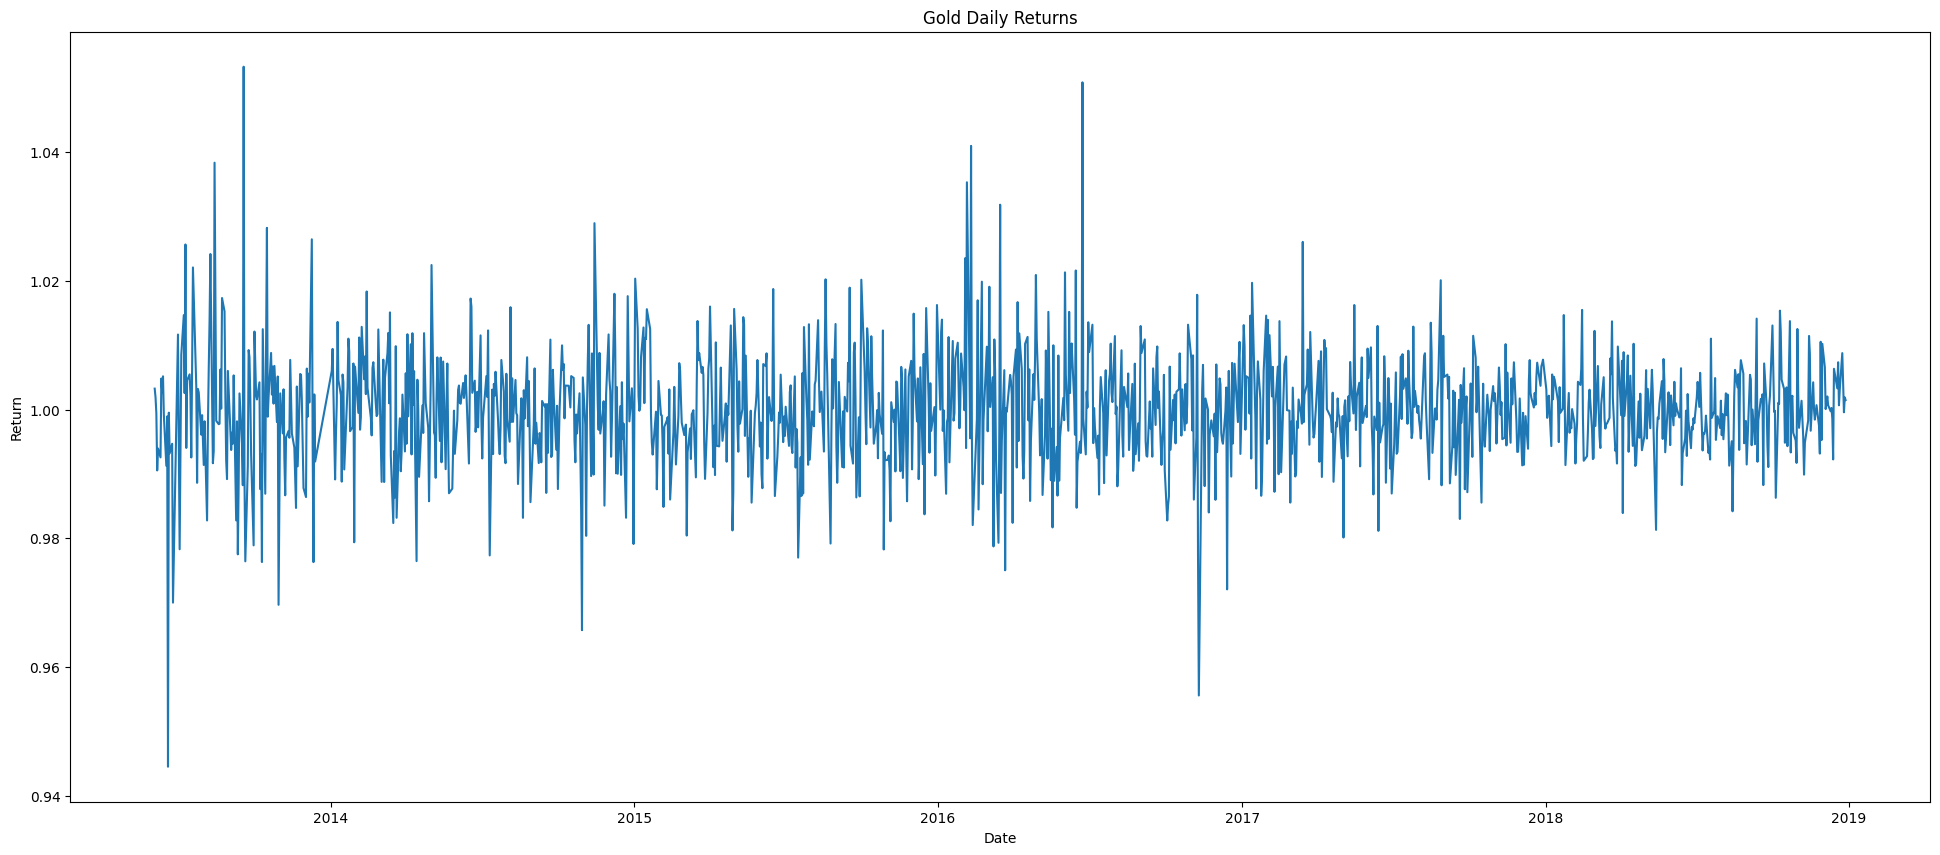

In [27]:
#Graph daily returns vs date 

fig,ax = plt.subplots(1,1,figsize=(24,10))
ax.plot(gold_df.date.shift(1), gold_daily_returns)
ax.set_title("Gold Daily Returns")
ax.set_xlabel("Date")
ax.set_ylabel("Return")


#saw that we saw most extreme returns between years 2013-2014

Text(0, 0.5, 'Volatility')

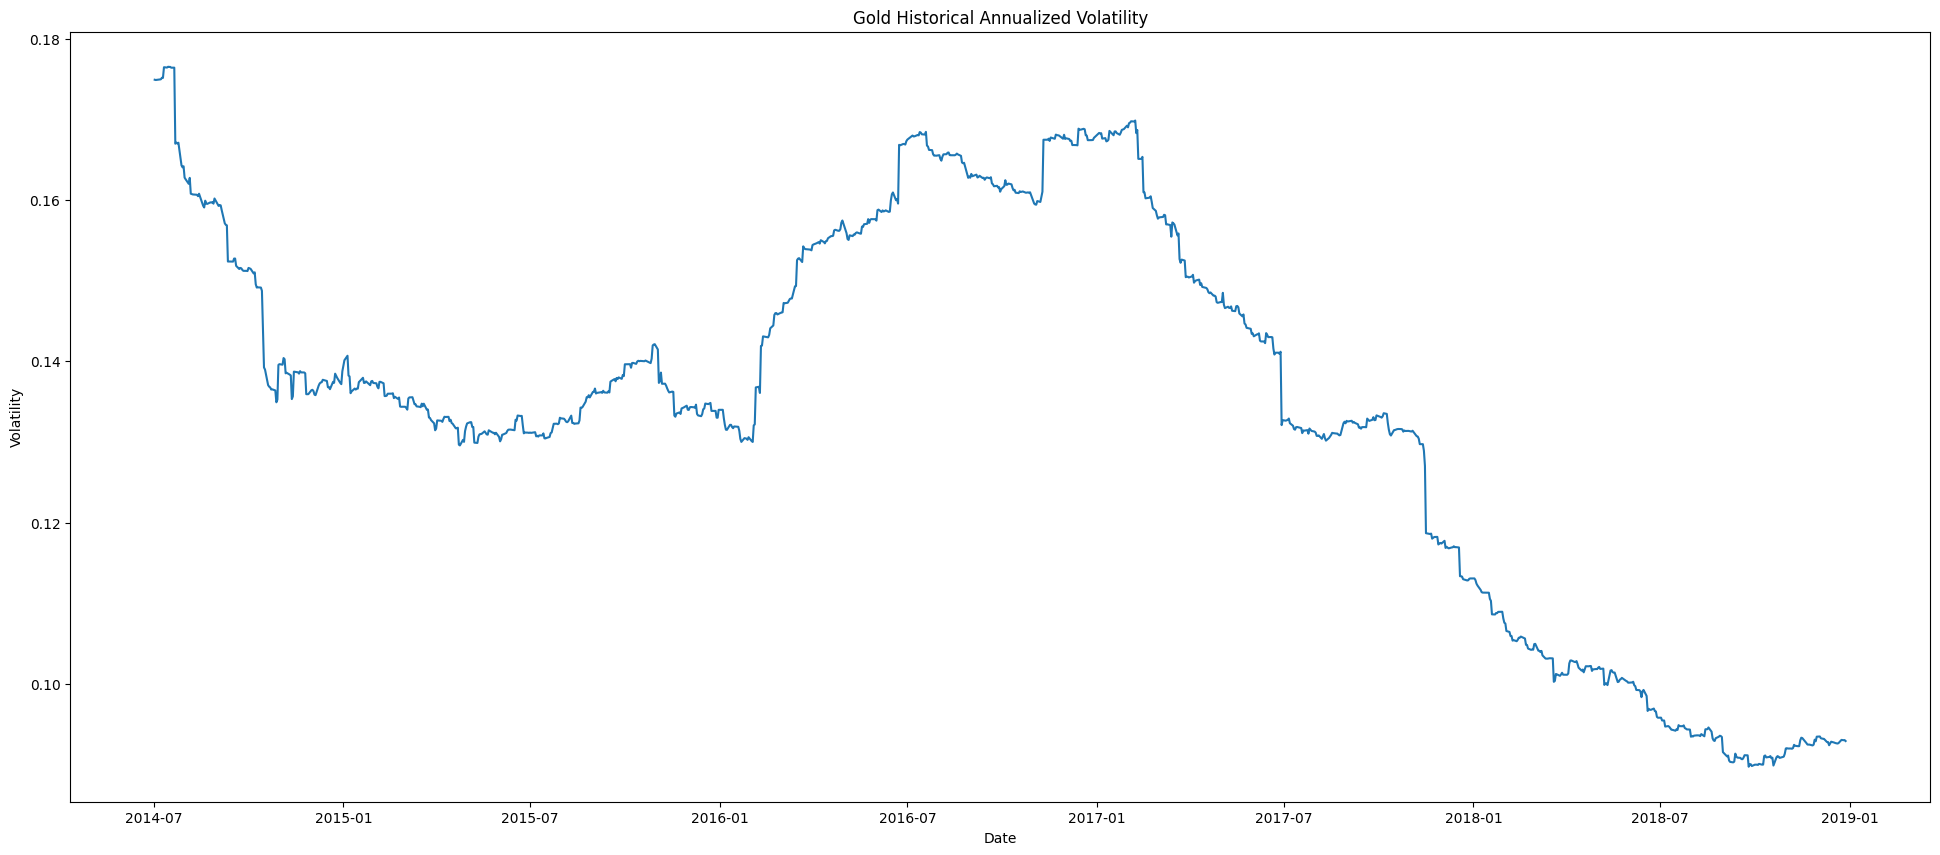

In [28]:
#Another important factor to look for asset prices is volatility
#To graph volatility, we first find the log of daily returns 
#Taking log allows us to normalize distribution, which is important
#before taking the standard deviation

#252 trading days per year 
#volatility is defined as the annualized standard deviation
#use rolling standard deviation to change over time, such as over the years
#done with time series data

#https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/
#https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db


gold_vol_252 = np.log(gold_daily_returns).rolling(window=252).std() * np.sqrt(252)




fig,ax = plt.subplots(1,1,figsize=(24,10))
ax.plot(gold_df.date.shift(1), gold_vol_252)
ax.set_title("Gold Historical Annualized Volatility")
ax.set_xlabel("Date")
ax.set_ylabel("Volatility")


#see that highest volatilty was between mid-2013 and mid 2014

#and then leveled for sometime, before sharp decline between 2017 and 2018
#before levelling beyond 2018





# Regression Models



In [29]:
#Before trying time series methods, we try to naive regression methods
#to see how well the models capture pattersn and consecutively returns

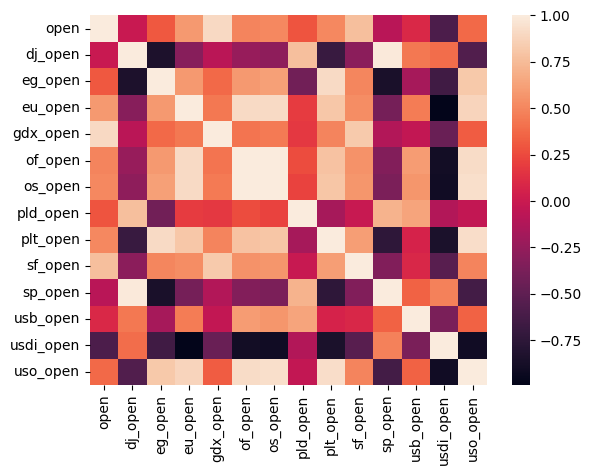

In [30]:
#Before doing implementing dimensionality reduction methods,
#we perform basic linear regression using all the assets

#We choose to use open prices for the various assets as the open price
#is availble for all assets and 
#consistent with our target variable of open gold price

#We begin by visualizing the correlation between open of each asset
#and gold 


#extract only the open for each asset and get correlation

gold_df_open = gold_df.filter(regex='open')

# Create a heatmap of the correlation between stock prices
sns.heatmap(gold_df_open.corr());

#most correlated just from looking include:
#eg_open,eu_open,gdx_open,of_open,os_open,plt_open,sf_open,uso_open(8/13)



In [31]:
#Extract open from train and test dfs, get X and y variables

train_df_open = train_df.filter(regex='open')
test_df_open = test_df.filter(regex='open')

X_train_open = train_df_open.drop(['open'], axis=1)
y_train_open = train_df_open['open']

X_test_open = test_df_open.drop(['open'], axis=1)
y_test_open = test_df_open['open']


# Base Linear Regression Model

In [32]:
X_train_open.head()

,dj_open,eg_open,eu_open,gdx_open,of_open,os_open,pld_open,plt_open,sf_open,sp_open,usb_open,usdi_open,uso_open
349,-1.860827,1.772284,0.805945,1.729656,0.984673,0.920175,0.464587,1.295986,0.640718,-2.227053,-0.280714,-0.935692,0.914714
350,-1.738732,1.701903,0.886892,1.744885,1.050740,0.982118,0.483606,1.442647,0.761493,-2.187477,-0.223133,-1.018407,0.920976
351,-1.819517,1.719498,0.890336,1.747060,1.102322,1.002259,0.468091,1.428287,0.679705,-2.275064,-0.377554,-1.001864,0.956759
352,-2.016702,1.725363,0.902392,1.757938,1.083244,0.995038,0.547168,1.519861,0.764036,-2.397685,-0.408961,-1.034950,0.970178
353,-1.934165,1.678443,1.032424,1.666567,1.108328,1.033040,0.437060,1.596370,0.805990,-2.225755,-0.147231,-1.169941,0.956759


In [33]:
#Initial multi linear regression model: Least Squares Method

#Import LineaRegression from sklearn
from sklearn.linear_model import LinearRegression



# Instantiate a LinearRegression model with default arguments and fit on the training set
lr = LinearRegression().fit(X_train_open, y_train_open)

#Print out the coefficients 

#print(lr.coef_)

# Calculate and print the training set R^2 of the LinearRegression model
lr_training_r2 = lr.score(X_train_open, y_train_open)

print(f'lr training set R^2: {lr_training_r2}')

#R^2 of 0.99 is high, can indicate multi collinearity


#display adjusted R-squared
#1 - (1-lr.score(X_train_open, y_train_open))*(len(y_train_open)-1)/(len(y_train_open)-X_train_open.shape[1]-1)



lr training set R^2: 0.9611095251767624


In [34]:
#Use 5-fold Cross Validation to get a sense of variation 
#    of Liner Regression R^2 performance on the training set.

# Import cross_val_score from sklearn.

from sklearn.model_selection import cross_val_score

# Generate 5-fold cross-validation R^2 scores 
#    for a LinearRegression model with default arguments 
#    on the training set


lr_cv_scores = cross_val_score(lr, X_train_open, y_train_open,scoring='r2')

# Print out the R^2 scores found by cross_val_score
np.round(lr_cv_scores,2)


#we can see that r^2 varies a lot across different cv's
#indicates that this model isn't the best fit for the data?
#either low correlation or multi collinarity?

array([0.71, 0.85, 0.62, 0.79, 0.23])

In [35]:
 #Calculate mean cv R^2 score +- 2 std. deviations

# Calculate the mean cross validation score using the scores created above
lr_cv_mean = lr_cv_scores.mean()

# Calculate 2 standard deviations of the cross validation scores
lr_cv_2std = lr_cv_scores.std() * 2

# Print out the mean R^2 +- 2 standard variations for the LinearRegression model
print(f'lr mean cv r2: {lr_cv_mean:.2f} +- {lr_cv_2std:.2f}')

lr mean cv r2: 0.64 +- 0.44


In [36]:
#Use trained linear regression model to make predictions
#get r^2 score and RMSE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(r2_score(y_test_open, lr.predict(X_test_open)))
print((mean_squared_error(y_test_open, lr.predict(X_test_open)))**0.5)

-0.5598001566666482
1.2489195957573282


# Dimensionality Reduction: LASSO Model

In [37]:
#We see that our linear regression model did poorly on our model
#we saw a large R^2 in our training set, which could be due to multicollinearity
#want use dimensionality reduction to reduce variables 
#to possible address multi collinearity and get better model



In [38]:
#Dimensionality Reduction: LASSO

from sklearn.linear_model import LassoCV

#LASSO has a hyperparamter, alpha, which we want to tune to best fit model
#We thus use LassoCV (which combines Lasso and GridSearchCV)
#to find best alpha using R^2 score and uses that to
#fit Lasso model to our data

#https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

reg2 = LassoCV(cv=5, random_state=0).fit(X_train_open, y_train_open)

#Print the alpha used after grid search cv 
print('alpha: %.2f' % reg2.alpha_)

#Print the score based on training set 
print(reg2.score(X_train_open, y_train_open))

#See if slopes of certain variables are zero (thus are dropped)
print(reg2.coef_)

alpha: 0.04
0.937838955903907
[-0.14133163  0.          0.          0.79069699  0.          0.
  0.          0.06006936  0.05511945 -0.         -0.         -0.
  0.        ]


In [39]:
#Dimensionality Reduction: LASSO

from sklearn.linear_model import LassoCV

#LASSO has a hyperparamter, alpha, which we want to tune to best fit model
#We thus use LassoCV (which combines Lasso and GridSearchCV)
#to find best alpha using R^2 score and uses that to
#fit Lasso model to our data

#https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

reg2 = LassoCV(cv=5, random_state=0).fit(X_train_open, y_train_open)

#Print the alpha used after grid search cv 
print('alpha: %.2f' % reg2.alpha_)

#Print the score based on training set 
print(reg2.score(X_train_open, y_train_open))

#See if slopes of certain variables are zero (thus are dropped)
print(reg2.coef_)

alpha: 0.04
0.937838955903907
[-0.14133163  0.          0.          0.79069699  0.          0.
  0.          0.06006936  0.05511945 -0.         -0.         -0.
  0.        ]


In [40]:
#See that some of the slopes are zero. to see which variables 
#have which slopes we can do 

coef_table = pd.DataFrame(list(X_train_open.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",reg2.coef_.transpose())
coef_table


#see the variables left after lassocv
#are plt_open, gdx_open, sf_open,sp_open,usb_open

,0,Coefs
0,dj_open,-0.141332
1,eg_open,0.000000
2,eu_open,0.000000
3,gdx_open,0.790697
4,of_open,0.000000
5,os_open,0.000000
6,pld_open,0.000000
7,plt_open,0.060069
8,sf_open,0.055119
9,sp_open,-0.000000


In [41]:
#Use 5-fold Cross Validation to get a sense of variation 
#    of Lasso R^2 performance on the training set.



# Generate 5-fold cross-validation R^2 scores 
#    for a LinearRegression model with default arguments 
#    on the training set


reg2_cv_scores = cross_val_score(reg2, X_train_open, y_train_open,scoring='r2')

# Print out the R^2 scores found by cross_val_score
np.round(reg2_cv_scores,2)


#we can see that r^2 still varies across different cv's
#but better than base linear regression model

#indicates that this model isn't the best fit for the data?
#either low correlation or multi collinarity?



array([0.82, 0.84, 0.76, 0.84, 0.49])

In [42]:
 #Calculate mean cv R^2 score +- 2 std. deviations

# Calculate the mean cross validation score using the scores created above
reg2_cv_mean = reg2_cv_scores.mean()

# Calculate 2 standard deviations of the cross validation scores
reg2_cv_2std = reg2_cv_scores.std() * 2

# Print out the mean R^2 +- 2 standard variations for the LinearRegression model
print(f'reg2 mean cv r2: {reg2_cv_mean:.2f} +- {reg2_cv_2std:.2f}')

#slightly better than base linear regression model

reg2 mean cv r2: 0.75 +- 0.27


In [43]:
#Use trained LASSO model to make predictions
#get r^2 score and RMSE


print(r2_score(y_test_open, reg2.predict(X_test_open)))
print((mean_squared_error(y_test_open, reg2.predict(X_test_open)))**0.5)

#r^2 is better than linear model but still below 0, model is 
#not predicting well

0.05942766283280043
0.9698310869255531


# Gradient Boosting: XGB Regression

In [44]:
#The final regression model that we will look at is XGB Regression

#While it has many hyperparamters, we want to focus on tuning 
#the following:

#max_depth: the max depth per tree 
#learning_rate: determines the step size
#n_estimators: number of trees in our ensemble
#reg_alpha – L1 regularization term on weights (xgb’s alpha)

#reg_alpha will help us combine the benefits of lasso dim reduction


In [45]:
#Instantiate xbg boost model and use gridsearchcv to find
#ideal hyperparameter values

import xgboost as xgb

xgb_reg =xgb.XGBRegressor(eval_metric=r2_score)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015],
              "alpha": [0.05,0.1,0.5]
             }


xgb_search = GridSearchCV(xgb_reg, param_grid, cv=5).fit(X_train_open, y_train_open)

print(xgb_search.best_params_)

{'alpha': 0.05, 'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}


In [47]:
#Use hyperparameter values from GridSearchCV to to create 
#xgb model and fit on the training data 

xgb_reg2=xgb.XGBRegressor(learning_rate = xgb_search.best_params_["learning_rate"],
                           n_estimators  = xgb_search.best_params_["n_estimators"],
                           max_depth     = xgb_search.best_params_["max_depth"],
                          alpha = xgb_search.best_params_["alpha"],
                         eval_metric=r2_score)

xgb_reg2.fit(X_train_open, y_train_open)

#Print the score based on training set 
print(xgb_reg2.score(X_train_open, y_train_open))




0.9968866501086029


In [48]:
#Use 5-fold Cross Validation to get a sense of variation 
#    of XGB R^2 performance on the training set.



# Generate 5-fold cross-validation R^2 scores 
#    for a LinearRegression model with default arguments 
#    on the training set


xgb_cv_scores = cross_val_score(xgb_reg2, X_train_open, y_train_open,scoring='r2')

# Print out the R^2 scores found by cross_val_score
np.round(xgb_cv_scores,2)


#we can see that r^2 still varies across different cv's
#but better than base linear regression model, not much diff than lasso

#indicates that this model isn't the best fit for the data?
#either low correlation or multi collinarity?



array([0.64, 0.71, 0.79, 0.67, 0.82])

In [49]:
 #Calculate mean cv R^2 score +- 2 std. deviations

# Calculate the mean cross validation score using the scores created above
xgb_cv_mean = xgb_cv_scores.mean()

# Calculate 2 standard deviations of the cross validation scores
xgb_cv_2std = xgb_cv_scores.std() * 2

# Print out the mean R^2 +- 2 standard variations for the LinearRegression model
print(f'xgb mean cv r2: {xgb_cv_mean:.2f} +- {xgb_cv_2std:.2f}')

#slightly better than base linear regression model
#not better than lasso

xgb mean cv r2: 0.73 +- 0.14


In [50]:
#Use trained XGB model to make predictions
#get r^2 score and RMSE


#Use trained xgb model on test data to predict 

print(r2_score(y_test_open, xgb_reg2.predict(X_test_open)))
print((mean_squared_error(y_test_open, xgb_reg2.predict(X_test_open)))**0.5)


#not much better than base linear or LASSO

#ask alpha




0.11009317062941204
0.9433487315784063


In [51]:
#Use trained xgb model on test data to predict 

print(r2_score(y_test_open, xgb_reg2.predict(X_test_open)))
print((mean_squared_error(y_test_open, xgb_reg2.predict(X_test_open)))**0.5)

0.11009317062941204
0.9433487315784063


In [52]:


print(r2_score(y_test_open, xgb_reg2.predict(X_test_open)))
print((mean_squared_error(y_test_open, xgb_reg2.predict(X_test_open)))**0.5)


0.11009317062941204
0.9433487315784063


In [53]:

xgb_reg2=xgb.XGBRegressor(learning_rate = xgb_search.best_params_["learning_rate"],
                           n_estimators  = xgb_search.best_params_["n_estimators"],
                           max_depth     = xgb_search.best_params_["max_depth"],
                          alpha = 1)


xgb_reg2.fit(X_train_open, y_train_open)





print(r2_score(y_test_open, xgb_reg2.predict(X_test_open)))
print((mean_squared_error(y_test_open, xgb_reg2.predict(X_test_open)))**0.5)


0.1400254750959713
0.9273481141966208


In [54]:
xgb_reg2.feature_importances_

#all small values

array([0.01862673, 0.00230371, 0.0015499 , 0.8405235 , 0.0066582 ,
       0.01494742, 0.00084762, 0.01034978, 0.04529027, 0.02505827,
       0.00663974, 0.02496013, 0.00224467], dtype=float32)

# Time Series Analysis

In [55]:
#We know our data is time series data as it collects daily gold prices
#over a certain time period

#After testing three regression models, we can see that none of them 
##are particularly good fits, and thus we must look elsewhere

#We can first start by performing time series analysis
#to better understand important properties of our data


#https://builtin.com/data-science/time-series-python


Stationarity


In [56]:
# stationarity means that the manner 
#in which time series data changes is constant

#stationary time series will not have any trends or seasonal patterns
#is an important assumption in various time series models 

#use dickey fuller method
#explain: https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test

#Step 1: calc rolling mean and std mean

#will use 252,as its trading days in year 

rolling_mean = gold_df_open['open'].rolling(252).mean()
rolling_std = gold_df_open['open'].rolling(252).std()

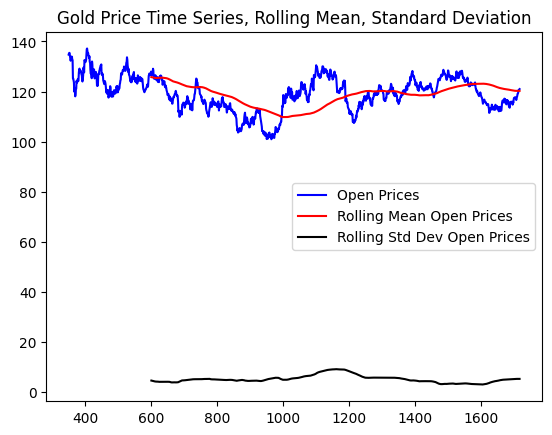

In [57]:
#graph this rolling mean,std with original data 

plt.plot(gold_df_open['open'], color="blue",label="Open Prices")
plt.plot(rolling_mean, color="red", label="Rolling Mean Open Prices")
plt.plot(rolling_std, color="black", label = "Rolling Std Dev Open Prices")
plt.title("Gold Price Time Series, Rolling Mean, Standard Deviation")

plt.legend(loc="best")

#see closely followed trend 


In [58]:
gold_df_open.head()


,open,dj_open,eg_open,eu_open,gdx_open,of_open,os_open,pld_open,plt_open,sf_open,sp_open,usb_open,usdi_open,uso_open
349,134.770004,15123.54981,40.900002,1.2983,29.799999,100.15,91.78,752.90,1461.95,43636.0,163.830002,2.128,83.355,32.930000
350,135.210007,15255.21973,40.299999,1.3077,29.870001,102.02,93.41,754.80,1493.10,44206.0,164.440002,2.150,82.730,33.000000
351,135.470001,15168.09961,40.450001,1.3081,29.879999,103.48,93.94,753.25,1490.05,43820.0,163.089996,2.091,82.855,33.400002
352,135.389999,14955.45020,40.500000,1.3095,29.930000,102.94,93.75,761.15,1509.50,44218.0,161.199997,2.079,82.605,33.549999
353,134.110001,15044.45996,40.099998,1.3246,29.510000,103.65,94.75,750.15,1525.75,44416.0,163.850006,2.179,81.585,33.400002


In [59]:
#Dickey-Fuller test, hypothesis test for stationarity
#check that denominator on beta*y(t-1) + constant = y(t)
#is 0 


from statsmodels.tsa.stattools import adfuller
adft = adfuller(gold_df_open['open'],autolag="AIC")


output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)


#our p value for all critical values (1%,5%,10%)
#is significantly large, and thus we reject null hypothesis 
#we have non stationarity

        Values                       Metric
0    -3.307025              Test Statistics
1     0.014567                      p-value
2     0.000000             No. of lags used
3  1368.000000  Number of observations used
4    -3.435139          critical value (1%)
5    -2.863655          critical value (5%)
6    -2.567896         critical value (10%)


Autocorrelation

In [60]:
#another important aspect is time series is the presence of autocorrelation
#autocorrelation measures how a values in a given time
#are correlated to past values

#ex)postive autocorrelation means high gold prices yesterday
#increases prob of high gold prices today
#is the basis of commonly used time series models

#can use pandas dataframe autocorrelation method to test for this 
#https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html


autocorr_lag_week = gold_df_open['open'].autocorr(lag=int(np.round(5)))
print("One Week Lag: ", autocorr_lag_week)

autocorr_lag_month = gold_df_open['open'].autocorr(lag=int(np.round(20)))
print("One Month Lag: ", autocorr_lag_month)


autocorr_lag_quarter = gold_df_open['open'].autocorr(lag=int(np.round(252/4)))
print("Quarter Year Lag: ", autocorr_lag_quarter)

autocorr_lag_half = gold_df_open['open'].autocorr(lag=int(np.round(252/2)))
print("Half Year Lag: ", autocorr_lag_half)


autocorr_lag_year = gold_df_open['open'].autocorr(lag=int(np.round(252)))
print("One Year Lag: ", autocorr_lag_year)


#see that more correlation for closer time frame
#decreases as time passes




One Week Lag:  0.9402348595263847
One Month Lag:  0.7691909440968949
Quarter Year Lag:  0.4454444908796099
Half Year Lag:  0.13206102544038723
One Year Lag:  -0.09921314966452371


Decomposition

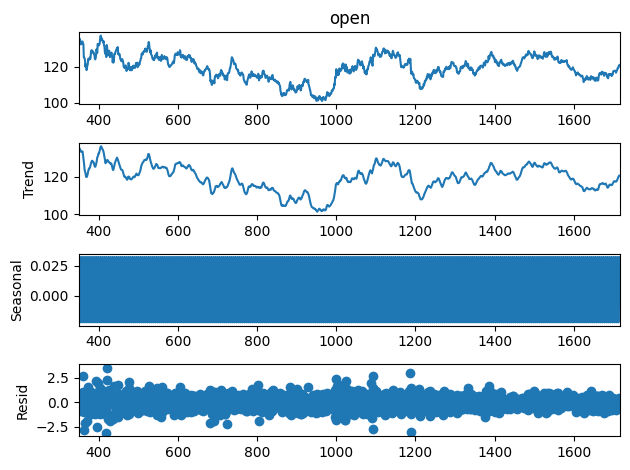

In [61]:
#time series decomposition is a process of deconstructing a time series into the following components:

#Trend — general movement over time
#Seasonal — behaviors captured in individual seasonal periods
#Residual — everything not captured by trend and seasonal components

#https://towardsdatascience.com/time-series-from-scratch-decomposing-time-series-data-7b7ad0c30fe7#:~:text=Simply%20put%2C%20time%20series%20decomposition,by%20trend%20and%20seasonal%20components


#Multiplicative trend means the trend is not linear (curved line), 
#and multiplicative seasonality means there are changes to 
#widths or heights of seasonal periods over time.


#checking both shows multiplicative gives more 
#use yearly just for clearer visualization purposes 

from statsmodels.tsa.seasonal import seasonal_decompose


#Weekly, additive 
decompose = seasonal_decompose(gold_df_open['open'],model='additive', period=5)
decompose.plot()
plt.show()

# Time Series Model: Basic Autoregressive Model

In [62]:
#We start with an 
#Auto-Regressive Integrated Moving Average (ARIMA) model

#this model assumes that previous values can be used to predict future values

#ARIMA has parameters:

#p is the order of the AR term
#q is the order of the MA term
#d is the number of differencing


#p is the order of the AR term. AR depends only on past values/lags 
#to predict future values, and p determines the number of 
#past values to consider to get single predict value

#q is the order of the MA term. MA model depends on past forecast errors
# to make predictions (linear combo of past forecast errors)

#d is number of differencing
#we can get stationarity by taking difference between consecutive rows
#d specified how many differences to take

#can get p,q,d by use auto.arima and using cross validation 
#to find best paramters


#SARIMAX has two orders:

#(p,d,q) order, which refers to the order of the time series. 
#This order is also used in the ARIMA model 
#(which does not consider seasonality);


#(P,D,Q,M) seasonal order, which refers to the order of the 
#seasonal component of the time series.
#we set these to (0,0,0,0) for ARIMA model

 


  


In [63]:
#define data for univariate time series analysis

train_df.head()
test_df.head()


y_train_df = pd.DataFrame(train_df['open']).set_index(train_df['date'])
y_test_df = pd.DataFrame(test_df['open']).set_index(test_df['date'])



In [64]:
y_train_df.diff().head()

,open
date,
2013-06-03,NaN
2013-06-04,0.055675
2013-06-05,0.032898
2013-06-06,-0.010123
2013-06-07,-0.161961


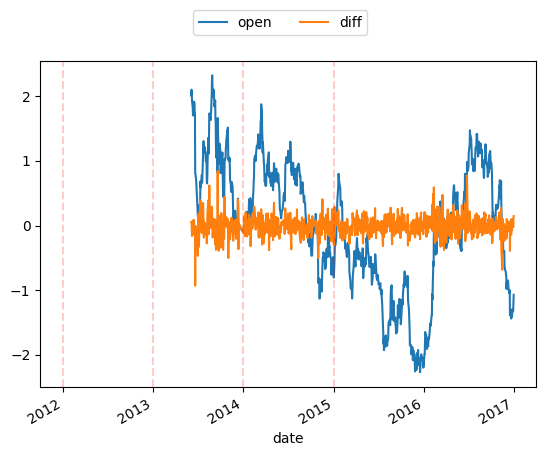

In [65]:
#acf -> remove trend 
y_train_df["diff"] = y_train_df.diff()

ax = y_train_df.plot()
ax.legend(ncol=5, 
          loc='upper center',
          bbox_to_anchor=(0.5, 1.0),
          bbox_transform=plt.gcf().transFigure)
for yr in range(2012, 2016):
    ax.axvline(pd.to_datetime(str(yr)+"-01-01"), color ="red", linestyle = "--", alpha = 0.2)

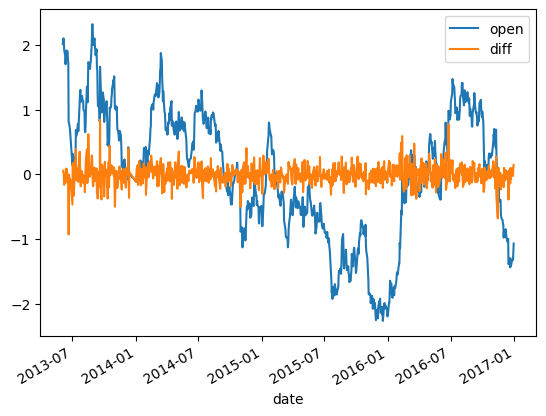

In [66]:
ax = y_train_df.plot()

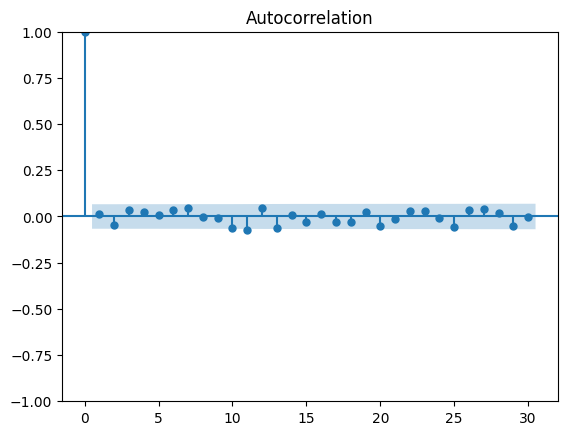

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
y_train_df["diff"].iloc[0] = 0
plot_acf(y_train_df["diff"])
plt.show()

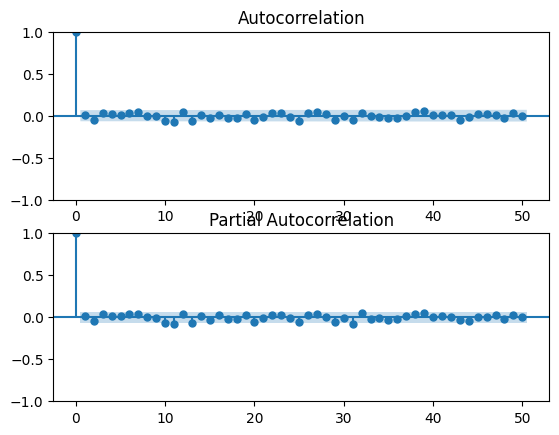

In [68]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(y_train_df['diff'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_train_df['diff'], lags=50, ax=ax[1])
plt.show()

In [69]:
#define data for univariate time series analysis

train_df.head()
test_df.head()


y_train_df = pd.DataFrame(train_df['open']).set_index(train_df['date'])
y_test_df = pd.DataFrame(test_df['open']).set_index(test_df['date'])



In [71]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.7 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-833.358, Time=0.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-831.498, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-831.512, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-834.870, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.540 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  873
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 418.435
Date:                Thu, 04 May 2023   AIC                           -834.870
Time:                        22:15:22   BIC                           -830.100
Sample:                             0   HQIC                          -833.045
                                - 873                                         
Co

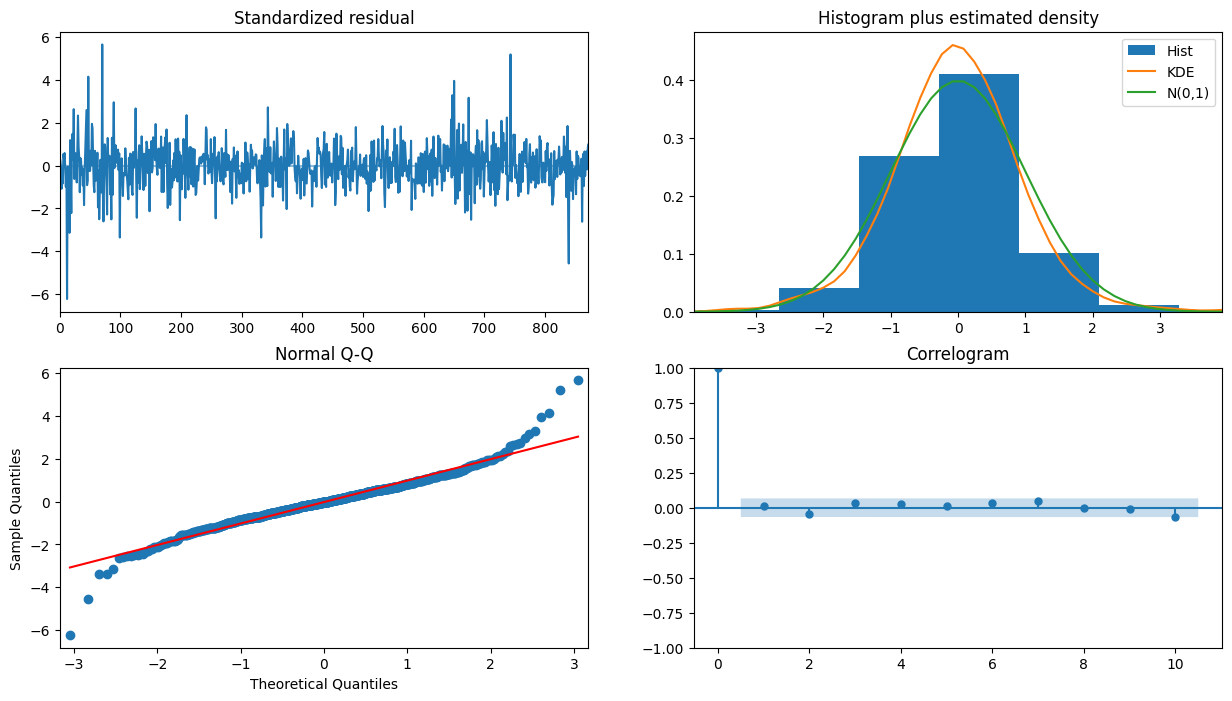

In [72]:
#Hyperparameter tuning for ARIMA and SARIMA (p,d,q) parameters


from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train_open, start_p=0, start_q=0,
     test='adf',       # use adftest to find optimal 'd'
     max_p=3, max_q=3, # maximum p and q
     m=1,              # frequency of series
     d=None,           # let model determine 'd'
     seasonal=False,   # No Seasonality
     start_P=0, 
     D=0, 
     trace=True,
     error_action='ignore',  
     suppress_warnings=True, 
     stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [73]:
#Uni variate regression using ARIMA 

arima = sm.tsa.statespace.SARIMAX(y_train_df,order=(0,1,0),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   open   No. Observations:                  873
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 417.525
Date:                Thu, 04 May 2023   AIC                           -833.049
Time:                        22:15:35   BIC                           -828.280
Sample:                             0   HQIC                          -831.224
                                - 873                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0224      0.001     37.634      0.000       0.021       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               741.36
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.08
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(0,496)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(np.array(y_test_df['open']),pred)))
print('ARIMA model RMSE:{}'.format((mean_squared_error(np.array(y_test_df['open']),pred))**0.5))      
      

ARIMA model MSE:1.4376583666483398
ARIMA model RMSE:1.199023922467079


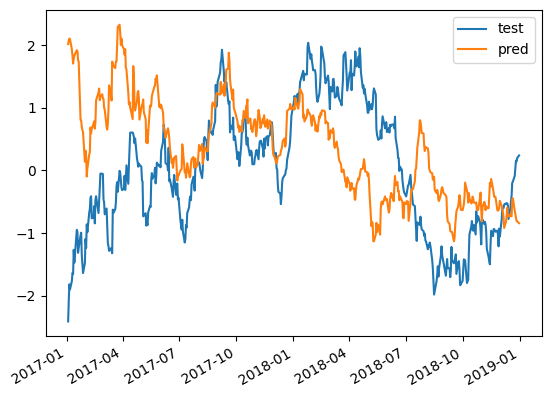

In [75]:
pd.DataFrame({'test':(np.array(y_test_df['open'])),'pred':pred}).set_index(y_test_df.index.values).plot()

plt.show()


In [76]:
#define data for multi- variate time series analysis

train_df.head()
test_df.head()

X_train_df = train_df.drop(columns=['open','date','eg_open','eu_open','of_open','os_open','pld_open','sp_open','usdi_open','uso_open','usb_open']).set_index(train_df['date'])
X_test_df = test_df.drop(columns=['open','date','eg_open','eu_open','of_open','os_open','pld_open','sp_open','usdi_open','uso_open','usb_open']).set_index(test_df['date'])

y_train_df = pd.DataFrame(train_df['open']).set_index(train_df['date'])
y_test_df = pd.DataFrame(test_df['open']).set_index(test_df['date'])

In [77]:
#multi variate regression using ARIMA 


from sklearn.metrics import mean_squared_error


arima = sm.tsa.statespace.SARIMAX(y_train_df,exog = X_train_df, order=(0,1,0),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()


pred = arima.predict(0,496,exog = X_test_df)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(np.array(y_test_df['open']),pred)))
print('ARIMA model RMSE:{}'.format((mean_squared_error(np.array(y_test_df['open']),pred))**0.5))      
      

ARIMA model MSE:1.4301037805908605
ARIMA model RMSE:1.1958694663678224


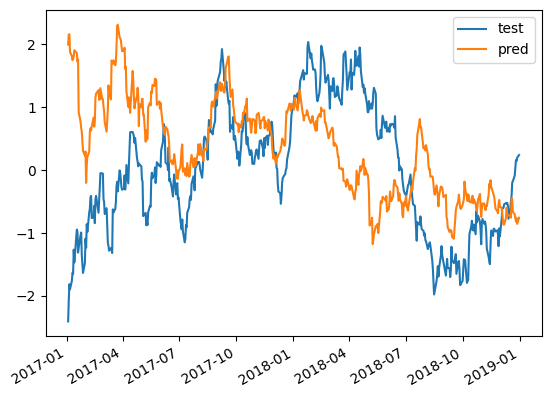

In [78]:
pd.DataFrame({'test':(np.array(y_test_df['open'])),'pred':pred}).set_index(y_test_df.index.values).plot()

plt.show()


SARIMA model MSE:1.4965957079135164
SARIMA model RMSE:1.223354285525463


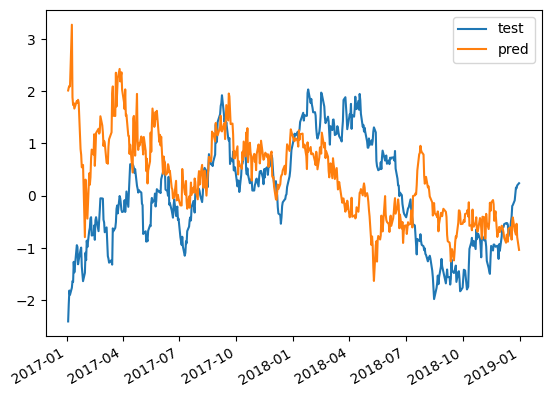

In [79]:
#we saw from earlier autocorrelation calculations using lags of different windows that the strongest autocorrelation 
#was seen in weekly ( 5 days a week for trading). Thus we try a SARIMA model a.k.a ARIMA model with a seasonality 
#component


#univariate using SARIMA

sarima = sm.tsa.statespace.SARIMAX(y_train_df,order=(0,1,0),seasonal_order=(0,1,0,5),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
sarima.summary()




from sklearn.metrics import mean_squared_error
pred = sarima.predict(0,496)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(np.array(y_test_df['open']),pred)))
print('SARIMA model RMSE:{}'.format((mean_squared_error(np.array(y_test_df['open']),pred))**0.5))      
      
    

pd.DataFrame({'test':(np.array(y_test_df['open'])),'pred':pred}).set_index(y_test_df.index.values).plot()

plt.show()


SARIMA model MSE:1.4337663995591006
SARIMA model RMSE:1.1973998494901779


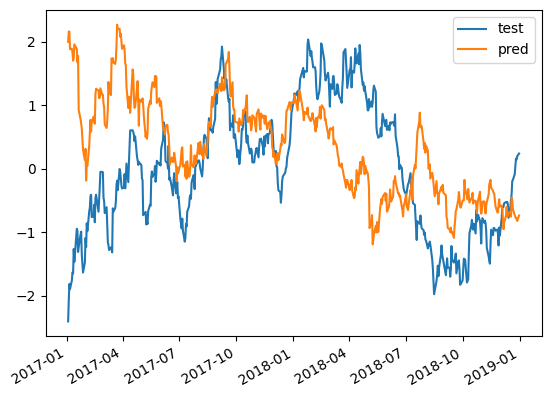

In [80]:
#we saw from earlier autocorrelation calculations using lags of different windows that the strongest autocorrelation 
#was seen in weekly ( 5 days a week for trading). Thus we try a SARIMA model a.k.a ARIMA model with a seasonality 
#component


#multivariate regression using SARIMA 

sarima = sm.tsa.statespace.SARIMAX(y_train_df,order=(0,1,0),exog = X_train_df, seasonal_order=(0,1,0,5),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
sarima.summary()




from sklearn.metrics import mean_squared_error
pred = sarima.predict(0,496,exog = X_test_df)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(np.array(y_test_df['open']),pred)))
print('SARIMA model RMSE:{}'.format((mean_squared_error(np.array(y_test_df['open']),pred))**0.5))      
      
    

pd.DataFrame({'test':(np.array(y_test_df['open'])),'pred':pred}).set_index(y_test_df.index.values).plot()

plt.show()
